# cracking model example

In [30]:
%matplotlib inline
import math_helper as mh
from cracking import Cracking_Model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
# raw data
class Param: pass
raw_pars = Param()

# material properties
r0_bar_mean = 5e-3          # rebar diameter [m]
f_t_mean=5.                 # concrete ultimate tensile strength[MPa]
E_0_mean=32e3               # concrete modulus of elasticity [Mpa]

x_loss_mean = 12.5e-6*0.6   # rebar section loss, mean [m]
cover_mean = 4e-2           # cover thickness, mean [m]

raw_pars.r0_bar = mh.normal_custom(r0_bar_mean, 0.1*r0_bar_mean, non_negative=True)
raw_pars.x_loss = mh.normal_custom(x_loss_mean, 0.1*x_loss_mean, non_negative=True)  # or from the corrosion model solution
raw_pars.cover = mh.normal_custom(cover_mean, 0.1*cover_mean, non_negative=True)
raw_pars.f_t = mh.normal_custom(f_t_mean, 0.1*f_t_mean, non_negative=True)
raw_pars.E_0 = mh.normal_custom(E_0_mean, 0.1*E_0_mean, non_negative=True)
raw_pars.w_c = mh.normal_custom(0.5, 0.1*0.6, non_negative=True)
raw_pars.r_v = mh.beta_custom(2.96, 2.96*0.05, 3.3, 2.6)  # rust volumetric expansion rate  2.96 lower 2.6  upper: 3.3



deterministic


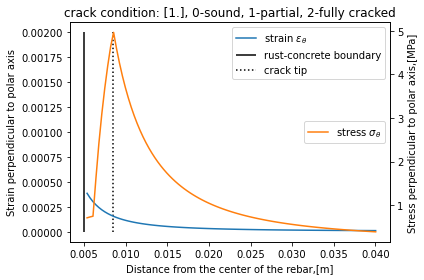

In [32]:
# initialize model
model_crack = Cracking_Model(raw_pars)
# run model in deterministic mode to check the stress and strain diagram 
model_crack.run(stochastic=False, plot_deterministic_result = True)

In [34]:
# run model in stochastic mode
model_crack.run(stochastic=True)
model_crack.postproc()

print(model_crack.crack_visible_rate_count)
print(model_crack.R_c - model_crack.pars.r0_bar) #/ M.pars.cover
print(model_crack.pars.cover)

0.0
[0.00331835 0.00862404 0.00906166 ... 0.01216338        nan        nan]
[0.04826291 0.04766364 0.04480496 ... 0.03879928 0.04277543 0.04130056]


<Figure size 432x288 with 0 Axes>

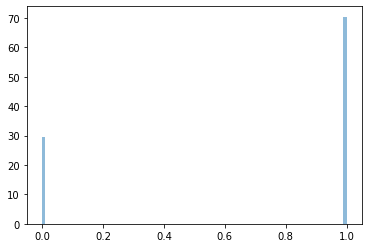

In [35]:
plt.figure()
mh.hist_custom(model_crack.crack_condition)

Text(0.5, 0, 'crack length/ cover')

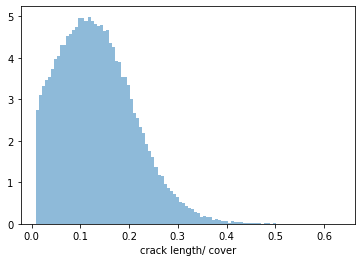

In [36]:
# histgram of the relative crack length though the cover
mh.hist_custom(model_crack.crack_length_over_cover[model_crack.crack_length_over_cover != 0]) # eliminate the uncracked case
plt.xlabel('crack length/ cover')